## 1. Instalação e importação das bibliotecas

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import heapq
import os
from scipy import sparse
from scipy.sparse import csr_matrix
!pip install surprise
from surprise import Reader, Dataset, SVD, dump
from surprise.model_selection import train_test_split, GridSearchCV
from surprise.model_selection import cross_validate
from surprise import accuracy
from wordcloud import WordCloud
from collections import defaultdict, Counter
from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095484 sha256=9d6ebd95691626645ed98e6e1d34bfee9a518280a10d80078e344a05da232f8e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


##2. Carregamento dos dados


In [ ]:
# Carregamento dos dados 
df = pd.read_csv(
  '/content/combined_data_1.txt',
  header=None, 
  names=['Cust_Id', 'Rating'], 
  usecols = [0, 1]
)

df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
# Carregamento dos dados de filmes
df_titles = pd.read_csv(
    '/content/movie_titles.csv', 
    encoding="ISO-8859-1",     
    header=None, 
    names=['Movie_Id', 'Year', 'Name'], 
    error_bad_lines=False
)
df_titles.head()

<ipython-input-3-aa0630453875>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_titles = pd.read_csv(
Skipping line 72: expected 3 fields, saw 4
Skipping line 264: expected 3 fields, saw 5
Skipping line 350: expected 3 fields, saw 4
Skipping line 366: expected 3 fields, saw 4
Skipping line 394: expected 3 fields, saw 4
Skipping line 466: expected 3 fields, saw 4
Skipping line 582: expected 3 fields, saw 4
Skipping line 600: expected 3 fields, saw 4
Skipping line 670: expected 3 fields, saw 4
Skipping line 672: expected 3 fields, saw 4
Skipping line 729: expected 3 fields, saw 4
Skipping line 776: expected 3 fields, saw 4
Skipping line 827: expected 3 fields, saw 4
Skipping line 834: expected 3 fields, saw 4
Skipping line 891: expected 3 fields, saw 4
Skipping line 913: expected 3 fields, saw 4
Skipping line 944: expected 3 fields, saw 4
Skipping line 973: expected 3 fields, saw 4
Skipping 

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


##3. Descrição dos dados

In [ ]:
# Informações sobre os tipos de dados do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [ ]:
#Exibe o tipo de dados da dataset e quantidade de dados faltantes.
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17434 entries, 0 to 17433
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movie_Id  17434 non-null  int64  
 1   Year      17427 non-null  float64
 2   Name      17434 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 408.7+ KB


In [ ]:
# Estatísticas básicas do dataset.
df.describe()

,Rating
count,2.405376e+07
mean,3.599634e+00
std,1.086118e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,5.000000e+00


In [ ]:
# Exibe o número de linhas x colunas e as informações do dataset.
print('O dataset tem {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataset tem 24058263 linhas e 2 colunas


In [ ]:
# Estatísticas básicas do dataset de filmes
df_titles.describe()

,Movie_Id,Year
count,17434.000000,17427.000000
mean,8879.132500,1990.295633
std,5129.547238,16.489299
min,1.000000,1896.000000
25%,4443.500000,1985.000000
50%,8873.000000,1997.000000
75%,13321.750000,2002.000000
max,17770.000000,2005.000000


In [ ]:
# Exibe o número de linhas x colunas e as informações do dataset.
print('O dataset tem {} linhas e {} colunas'.format(df_titles.shape[0], df_titles.shape[1]))

O dataset tem 17434 linhas e 3 colunas


##4. Limpeza e transformação dos dados

In [ ]:
# Contando a quantidade de linhas nulas
df_titles.isnull().sum()

Movie_Id    0
Year        7
Name        0
dtype: int64

In [ ]:
# Removendo linhas com valores nulos
df_titles.dropna(inplace=True)


In [ ]:
# Convertendo a coluna de ano para o tipo inteiro
df_titles['Year'] = df_titles['Year'].astype(int)

In [ ]:
# Verificar se há linhas duplicadas
print('Quantidade de linhas duplicadas: {}'.format(df_titles.duplicated()))


Quantidade de linhas duplicadas: 0        False
1        False
2        False
3        False
4        False
         ...  
17429    False
17430    False
17431    False
17432    False
17433    False
Length: 17427, dtype: bool


In [ ]:
# Remover espaços em branco no início e no final da string
df_titles['Name'] = df_titles['Name'].str.strip()

In [ ]:
# Exibe o dataset com os títulos dos filmes
df_titles

,Movie_Id,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17429,17766,2002,Where the Wild Things Are and Other Maurice Se...
17430,17767,2004,Fidel Castro: American Experience
17431,17768,2000,Epoch
17432,17769,2003,The Company


In [ ]:
# Criar um novo dataset chamado "df_emptyValues" 
# que contém apenas valores nulos (NaN) da coluna "Rating" do dataset "df"

df_emptyValues = pd.DataFrame(pd.isnull(df.Rating))
df_emptyValues = df_emptyValues[df_emptyValues['Rating'] == True]
df_emptyValues = df_emptyValues.reset_index()

In [ ]:
# Adicionar a coluna Movie_Id no dataset
movie_np = []
movie_id = 1


for i,j in zip(df_emptyValues['index'][1:],df_emptyValues['index'][:-1]):    
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

In [ ]:
# Conta o último registro e seu comprimento
last_record = np.full((1,len(df) - df_emptyValues.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)
'Movie numpy: {}'.format(movie_np), 'Length: {}'.format(len(movie_np))

('Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]',
 'Length: 24053764')

In [ ]:
# Remove as linhas do Movie ID
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
df.iloc[::5000000, :]

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
5000996,501954,2.0,996
10001962,404654,5.0,1962
15002876,886608,2.0,2876
20003825,1193835,2.0,3825


In [ ]:
df.head()

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


## 5. Análises exploratória dos dados

In [ ]:
print("Totalizadores")
print("-"*50)
print("\nTotal de classificações :",df.shape[0])
print("Total de clientes   :", len(np.unique(df["Cust_Id"])))
print("Total de filmes  :", len(np.unique(df["Movie_Id"])))

Totalizadores
--------------------------------------------------

Total de classificações : 24053764
Total de clientes   : 470758
Total de filmes  : 4499


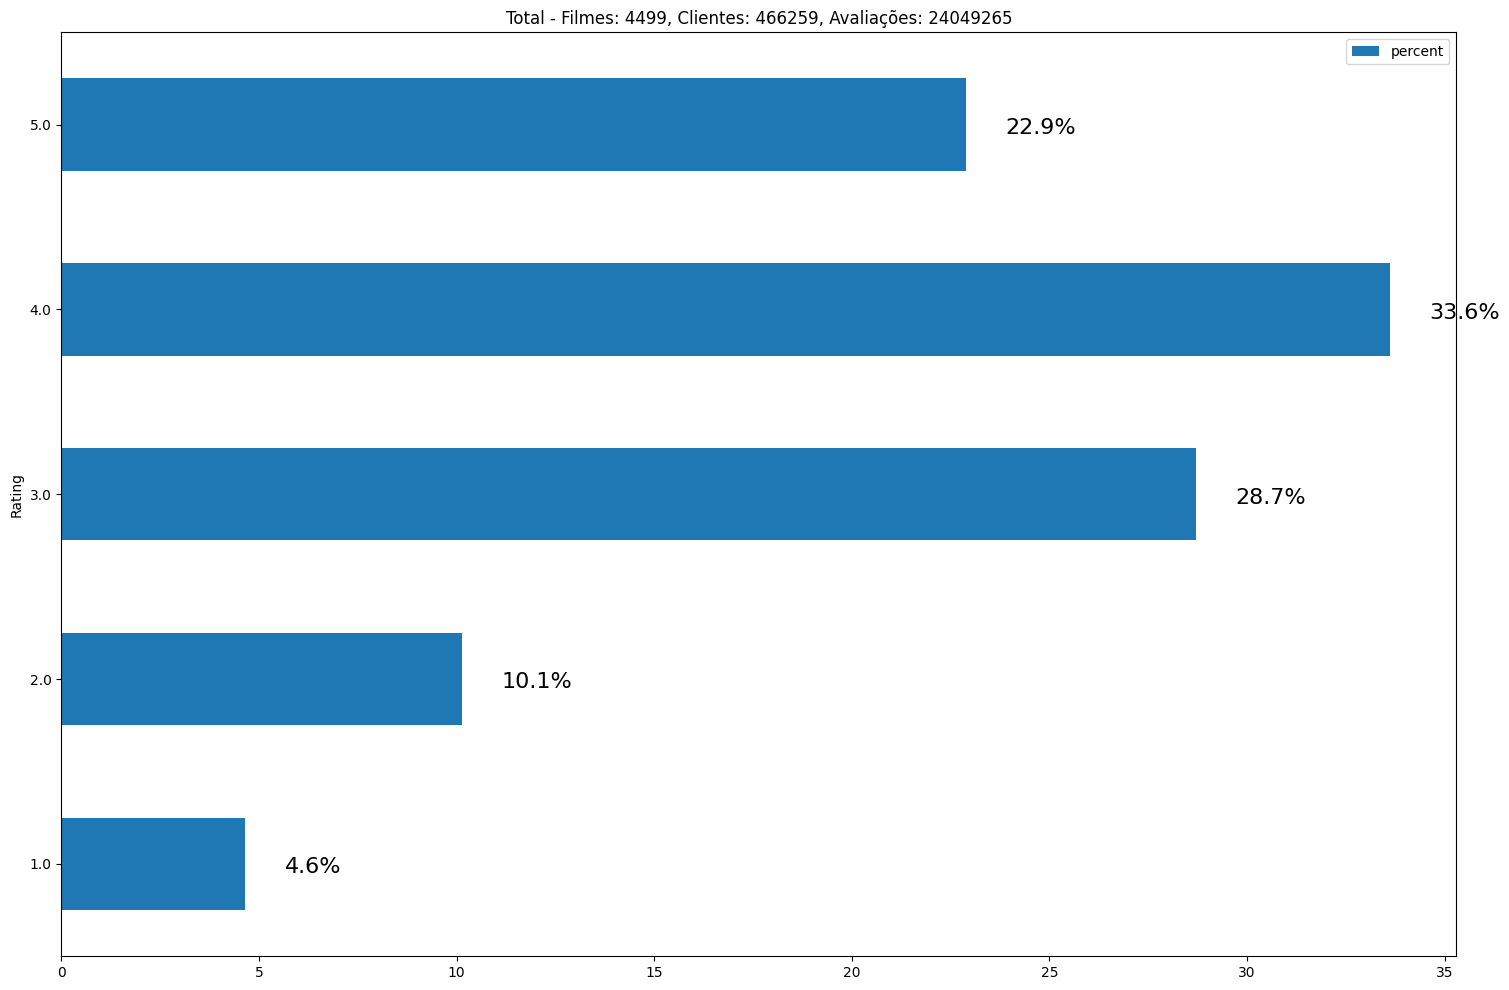

In [ ]:
# Gráfico de percentuais de avaliações dos filmes

# Número de filmes 
movie_count = df['Movie_Id'].nunique()

# Número total de classificação dada pelo cliente
customer_count = df["Cust_Id"].nunique() - movie_count

# Contagem de classificação
rating_count = df["Cust_Id"].count() - movie_count

def calculate_ratings_percentage(stars, Rating):
    # Agrupa os dados por classificação e calcule a contagem de cada classificação
    rating_counts = df.groupby(Rating).size().reset_index(name='count')
    
# Calcula a porcentagem de cada avaliação
    total_ratings = rating_counts['count'].sum()
    rating_counts['percent'] = rating_counts['count'] / total_ratings * 100
    
    return rating_counts
rating_counts = calculate_ratings_percentage(df, "Rating")

# Plota o gráfico de barras horizontais
ax = rating_counts.plot(kind = "barh", y='percent', x='Rating', legend = True, figsize = (18, 12))
plt.title("Total - Filmes: {}, Clientes: {}, Avaliações: {}".format(movie_count, customer_count, rating_count))


# Adiciona os valores percentuais dentro das barras
for i in ax.patches:
    ax.annotate(str(round(i.get_width(), 1))+'%', (i.get_width() +1, i.get_y() + 0.2), fontsize=16, color='black')

plt.show()


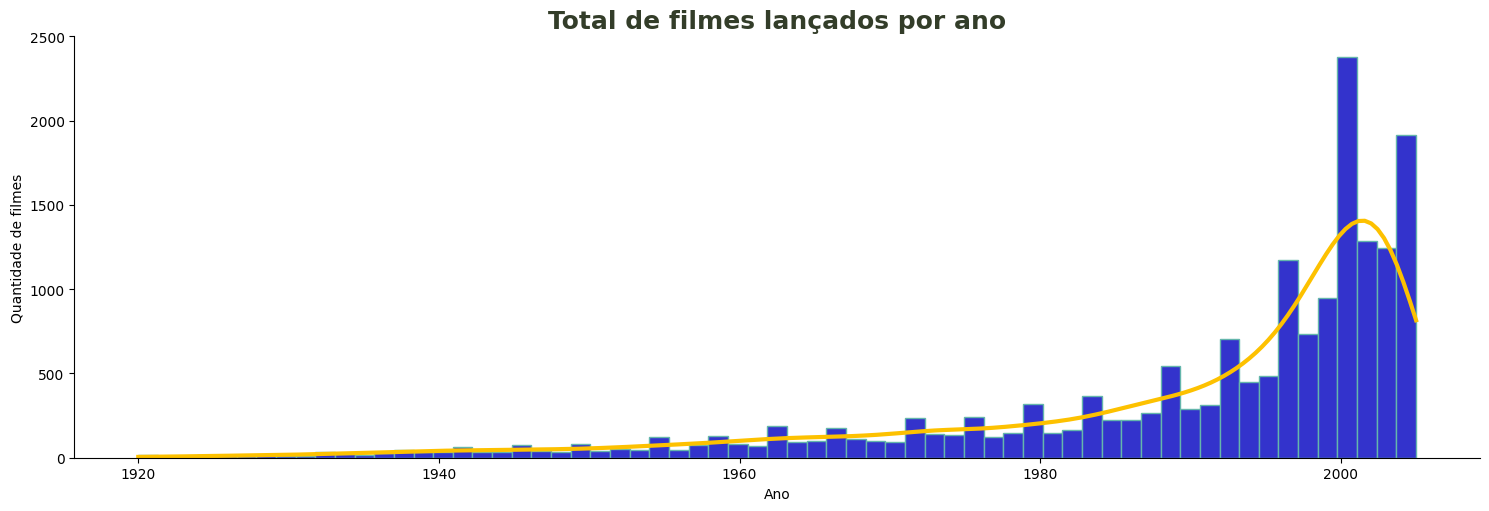

In [ ]:
# Filtrar filmes lançados de 1920 a 2023
df_filtered = df_titles[(df_titles['Year'] >= 1920) & (df_titles['Year'] <= 2023)]

# Grafico de filmes por ano
sns.displot(data=df_filtered, x='Year', kind='hist', kde=True,
            color='#fdc100', facecolor='#3333cc', edgecolor='#64b6ac', line_kws={'lw': 3}, aspect=3)
plt.title('Total de filmes lançados por ano', fontsize=18, weight=600, color='#333d29')
plt.xlabel('Ano')
plt.ylabel('Quantidade de filmes')

plt.show()

In [ ]:
# Verificar a frequência das categorias da variável categórica:
df['Rating'].value_counts()

4.0    8085741
3.0    6904181
5.0    5506583
2.0    2439073
1.0    1118186
Name: Rating, dtype: int64

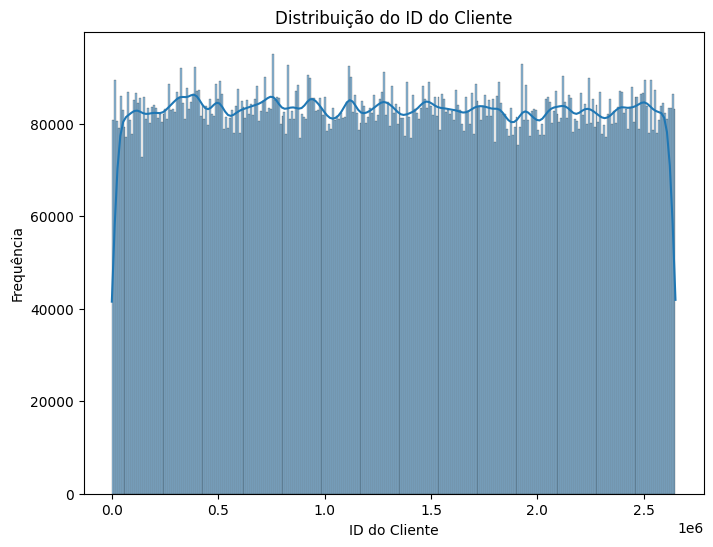

In [ ]:
# Histograma do ID do cliente
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Cust_Id', kde=True)
plt.xlabel('ID do Cliente')
plt.ylabel('Frequência')
plt.title('Distribuição do ID do Cliente')
plt.show()

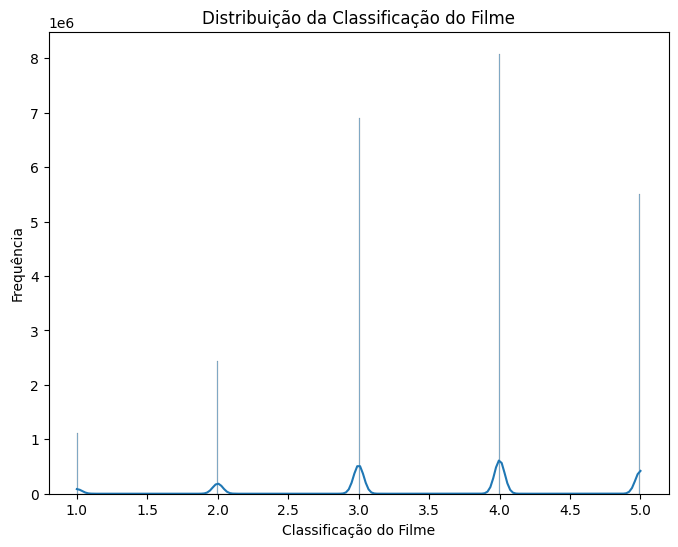

In [ ]:
# Histograma da classificação do filme
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Rating', kde=True)
plt.xlabel('Classificação do Filme')
plt.ylabel('Frequência')
plt.title('Distribuição da Classificação do Filme')
plt.show()

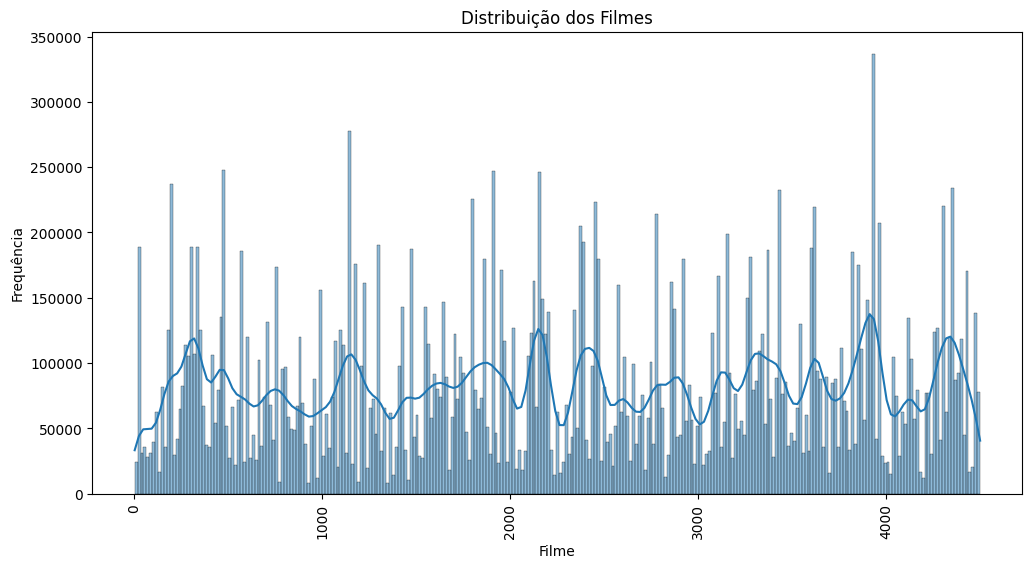

In [ ]:
# Histograma dos filmes
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Movie_Id', kde=True)
plt.xticks(rotation=90)
plt.xlabel('Filme')
plt.ylabel('Frequência')
plt.title('Distribuição dos Filmes')
plt.show()

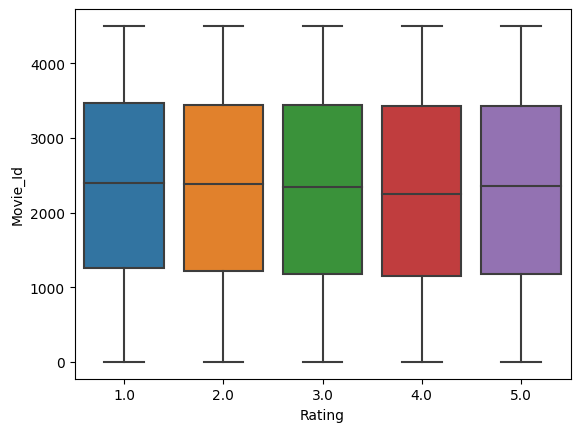

In [ ]:
# Visualizar a distribuição da variável numérica por categoria da variável categórica:
sns.boxplot(data=df, x='Rating', y='Movie_Id')
plt.show()

In [ ]:
# Verificar a frequência das categorias da variável categórica:
df['Rating'].value_counts()

4.0    8085741
3.0    6904181
5.0    5506583
2.0    2439073
1.0    1118186
Name: Rating, dtype: int64

In [ ]:
# Calcular as estatísticas resumidas das classificações
stats = df['Rating'].describe()

# Imprimir as estatísticas resumidas
print("Estatísticas resumidas das classificações:")
print("Média: ", stats['mean'])
print("Mediana: ", stats['50%'])
print("Desvio padrão: ", stats['std'])
print("Primeiro quartil (25%): ", stats['25%'])
print("Terceiro quartil (75%): ", stats['75%'])

Estatísticas resumidas das classificações:
Média:  3.5996343025565563
Mediana:  4.0
Desvio padrão:  1.086118197852145
Primeiro quartil (25%):  3.0
Terceiro quartil (75%):  4.0


In [ ]:
# Calcular as estatísticas resumidas dos filmes
stats = df['Movie_Id'].describe()

# Imprimir as estatísticas resumidas
print("Estatísticas resumidas das classificações:")
print("Média: ", stats['mean'])
print("Mediana: ", stats['50%'])
print("Desvio padrão: ", stats['std'])
print("Primeiro quartil (25%): ", stats['25%'])
print("Terceiro quartil (75%): ", stats['75%'])

Estatísticas resumidas das classificações:
Média:  2308.3239047743214
Mediana:  2342.0
Desvio padrão:  1303.9093031879972
Primeiro quartil (25%):  1180.0
Terceiro quartil (75%):  3433.0


In [ ]:
# Calcular as estatísticas resumidas dos clientes
stats = df['Cust_Id'].describe()

# Imprimir as estatísticas resumidas
print("Estatísticas resumidas das classificações:")
print("Média: ", stats['mean'])
print("Mediana: ", stats['50%'])
print("Desvio padrão: ", stats['std'])
print("Primeiro quartil (25%): ", stats['25%'])
print("Terceiro quartil (75%): ", stats['75%'])

Estatísticas resumidas das classificações:
Média:  1322285.3422910443
Mediana:  1318602.0
Desvio padrão:  764577.9360816334
Primeiro quartil (25%):  660927.0
Terceiro quartil (75%):  1984358.0


##6. Análises estatísticas e de correlação

In [ ]:

# Verificar as primeiras linhas do conjunto de dados
print(df.head())

   Cust_Id  Rating  Movie_Id
1  1488844     3.0         1
2   822109     5.0         1
3   885013     4.0         1
4    30878     4.0         1
5   823519     3.0         1


In [ ]:
# Verificar as estatísticas descritivas dos dados numéricos
print(df.describe())

            Cust_Id        Rating      Movie_Id
count  2.405376e+07  2.405376e+07  2.405376e+07
mean   1.322285e+06  3.599634e+00  2.308324e+03
std    7.645779e+05  1.086118e+00  1.303909e+03
min    6.000000e+00  1.000000e+00  1.000000e+00
25%    6.609270e+05  3.000000e+00  1.180000e+03
50%    1.318602e+06  4.000000e+00  2.342000e+03
75%    1.984358e+06  4.000000e+00  3.433000e+03
max    2.649429e+06  5.000000e+00  4.499000e+03


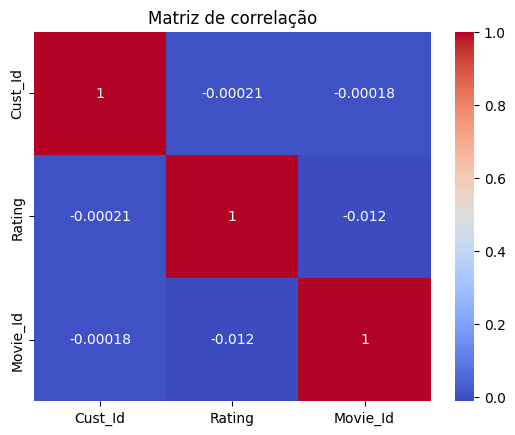

In [ ]:
# Verificar as correlações entre as variáveis
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlação")
plt.show()

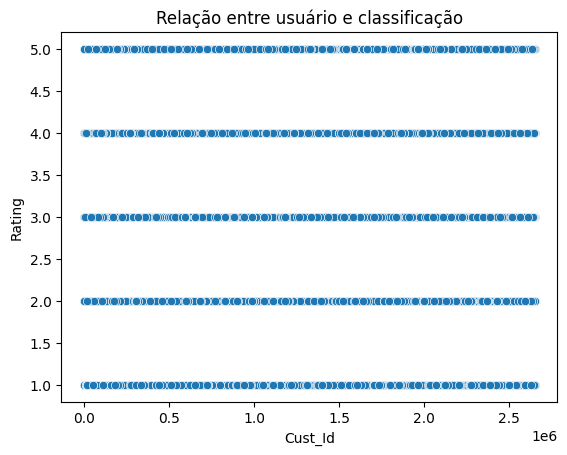

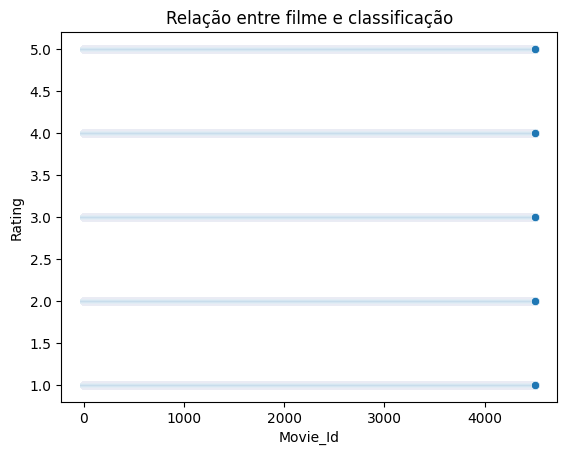

In [ ]:
# Verificar a relação entre as variáveis
sns.scatterplot(x='Cust_Id', y='Rating', data=df)
plt.title("Relação entre usuário e classificação")
plt.show()

sns.scatterplot(x='Movie_Id', y='Rating', data=df)
plt.title("Relação entre filme e classificação")
plt.show()

## 7. Análises de agrupamento


In [ ]:
# Filtrar os primeiros 5000 registros
ratings_df = df.head(100000)

In [ ]:
ratings_df

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
100025,2146325,5.0,30
100026,2103907,3.0,30
100027,2581477,4.0,30
100028,2182488,4.0,30


In [ ]:
# Criação da matriz de classificações de filmes por usuário
ratings_matrix = ratings_df.pivot_table(index='Cust_Id', columns='Movie_Id', values='Rating')

In [ ]:
# Substituição dos valores NaN por 0
ratings_matrix = ratings_matrix.fillna(0)

In [ ]:
print(ratings_matrix)

Movie_Id   1    2    3    4    5    6    7    8    9    10  ...   21   22  \
Cust_Id                                                     ...             
7         0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  ...  0.0  0.0   
134       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
201       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
261       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
265       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2649331   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2649336   0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  ...  0.0  0.0   
2649375   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2649378   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2649426   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

In [ ]:
# Aplicação do K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(ratings_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

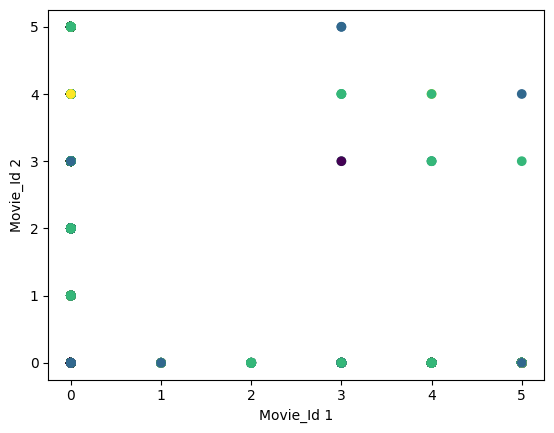

In [ ]:
# Plotagem do gráfico de dispersão dos clusters
plt.scatter(ratings_matrix.iloc[:, 0], ratings_matrix.iloc[:, 29], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Movie_Id 1')
plt.ylabel('Movie_Id 2')
plt.show()

In [ ]:
# exibição dos resultados
clusters = pd.DataFrame({'Cust_Id': ratings_matrix.index, 'Cluster': kmeans.labels_})
print(clusters.head())

   Cust_Id  Cluster
0        7        0
1      134        1
2      201        1
3      261        2
4      265        1


##8. Recomendação por Filtragem Colaborativa


In [ ]:
# Definir a configuração do leitor
reader = Reader(rating_scale=(1, 5))

In [ ]:
# Carregar o conjunto de dados
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

In [ ]:
# Dividir o conjunto de dados em treinamento e teste
train_data, test_data = train_test_split(data, test_size=0.25)

In [ ]:
# Definir os parâmetros a serem testados para encontrar o melhor modelo
param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [20, 30, 40], 'lr_all': [0.002, 0.005, 0.01]}

In [ ]:
# Treinar o modelo de filtragem colaborativa (SVD)
model = SVD()

In [ ]:
# Treinar o modelo usando os dados de treinamento
model.fit(train_data)

In [ ]:
# Filtrar o usuário 337541 mostrando o que o mesmo gostou no passado:
user_337541 = df[(df['Cust_Id'] == 337541) & (df['Rating'] == 5)]
user_337541 = user_337541.set_index('Movie_Id')
user_337541 = user_337541.join(df_titles)['Name']
user_337541

Movie_Id
1                              Isle of Man TT 2004 Review
273                                          Cold Harvest
458                            The Return of Ruben Blades
886                                           Fascination
1173                      50 Years: The Best of Hollywood
1470            Korn: Kornography: Unauthorized Biography
1905                                      Nightmare Alley
1941                                        Here on Earth
2098                                  Jesus and His Times
2171                                       On Golden Pond
2290                                               Vulgar
2372    Harry Potter and the Prisoner of Azkaban: Bonu...
2452                                          Exit Wounds
2754                                   Muppets From Space
3079                                      Vampyros Lesbos
3197                                       State Property
3938                                        Random Hearts
3962 

In [ ]:
# Fazer previsões no conjunto de teste
predictions = model.test(test_data)

In [ ]:
# Gerar os itens que o usuário não assistiu
user_id = 337541
anti_testset = train_data.build_anti_testset()
anti_testset = filter(lambda x: x[0] == user_id, anti_testset)

In [ ]:
# Fazer previsões para os filmes não assistidos pelo usuário
predictions = model.test(anti_testset)

In [ ]:
# Ordenar as previsões em ordem decrescente de classificação estimada
top_n = heapq.nlargest(10, predictions, key=lambda x: x.est)

In [ ]:
# Exibir os melhores filmes recomendados para o usuário
print(f"Recomendações de filmes para o usuário {user_id}:")
for prediction in top_n:
    movie_id = prediction.iid
    estimated_rating = prediction.est
    print(f"Filme: {movie_id} - Previsão de classificação: {estimated_rating}")

Recomendações de filmes para o usuário 337541:
Filme: 5 - Previsão de classificação: 4.753564478136663
Filme: 13 - Previsão de classificação: 4.584619188844299
Filme: 3 - Previsão de classificação: 4.182306257609515
Filme: 8 - Previsão de classificação: 4.063641983773293
Filme: 25 - Previsão de classificação: 3.8610708308988815
Filme: 23 - Previsão de classificação: 3.803716055263284
Filme: 18 - Previsão de classificação: 3.8013528291800953
Filme: 29 - Previsão de classificação: 3.7913235268724916
Filme: 2 - Previsão de classificação: 3.714574404609226
Filme: 27 - Previsão de classificação: 3.6894640075151606


In [ ]:
# Calcular a precisão do modelo
accuracy.rmse(predictions)

RMSE: 0.6122


0.6122345291347763

In [ ]:
# Salvar o modelo treinado em um arquivo
model_file = 'modelo_svd.pkl'
dump.dump(model_file, algo=model)

In [ ]:
# Carregar o modelo treinado de um arquivo
loaded_model = dump.load(model_file)[1]